In [1]:
import pandas as pd
import numpy as np

# Filter all warnings.
import warnings
warnings.filterwarnings('ignore')

To start the manipulating process, We should read the information which are in `Energy_Indicators.xls` (which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013), `world_bank.csv` (containing countries' GDP from 1960 to 2015 from World Bank), and `scimagojr.xlsx` (which ranks countries based on their journal contributions in the aforementioned area) files. 

**1.in the `Energy_Indicators.xls` dataset:**

we should exclude footer and header rows so that we have Afghanistan in the 1st row and Zimbabwe in the last row, and get rid of the first 2 columns. then we change the column labels, and convert `Energy Supply` to `gigajoules`. For all countries which have missing data (with "..."), We should consider the np.NaN value. Finally, We should get rid of parentheses that are in country names, and rename some countries like the `United States of America` to the `United States`.

**2.in the `world_bank.csv` dataset:**

we just need to rename some countries and skip header rows.

**3.in the `scimagojr.xlsx` dataset:**

we just need to join the three datasets.


In [92]:
# Respect to the shape of dataset we have, we find the value of skiprows(the frist 17 rows)
# and skipfooter(283 - 245 = 38).
Energy = pd.read_excel('datasets/Energy_Indicators.xls', skiprows= 17, skipfooter= 38 )
                         
Energy.drop(["Unnamed: 0", 'Unnamed: 1'], axis= 1, inplace= True)
                         
Energy = Energy.rename({'Unnamed: 2': 'Country', 'Petajoules': 'Energy Supply',
              'Gigajoules': 'Energy Supply per Capita', '%': '% Renewable'}, axis= 'columns')
                                                                                             
Energy['Energy Supply'] = Energy['Energy Supply'] * (10 ** 6)

Energy = Energy.replace('...', np.nan)
Energy = Energy.replace('[\d]+$', '', regex= True)
Energy['Country'] = Energy['Country'].replace('\s\(.*\)', '', regex= True)

Energy['Country'] = Energy['Country'].replace(['Republic of Korea', 'United States of America',
                                              'United Kingdom of Great Britain and Northern Ireland',
                                              'China, Hong Kong Special Administrative Region'],
                                             ['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])
                         
        
GDP = pd.read_csv('datasets/world_bank.csv', skiprows= 4)
GDP = GDP[['Country Name', '2006', '2007', '2008', '2009',
              '2010', '2011', '2012', '2013', '2014', '2015']]

GDP['Country Name'] = GDP['Country Name'].replace(["Korea, Rep.", "Iran, Islamic Rep.", "Hong Kong SAR, China"],
                                ['South Korea', 'Iran', 'Hong Kong'])
    
GDP.columns = ['Country', '2006','2007', '2008', '2009', '2010',
                   '2011', '2012', '2013', '2014', '2015']
    
    
ScimEn = pd.read_excel('datasets/scimagojr.xlsx')
    
merged_df = pd.merge(ScimEn, Energy, how= 'inner', on= 'Country')
df = pd.merge(merged_df, GDP, how= 'inner', on= 'Country')
df.set_index('Country', inplace= True)
    
df = df.head(15)
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


by using the following cell, we can calculate the mean of the top 15 countries' GDP from 2006 to 2015.

In [100]:
GDPdf = df[['2006', '2007', '2008', '2009', '2010',
                    '2011', '2012', '2013', '2014', '2015']]
    
def mean_GDP(record):
    record["avgGDP"] = np.nanmean(record)
    return record

GDPdf = GDPdf.apply(mean_GDP, axis= 1)
GDPdf = GDPdf.sort_values(by= 'avgGDP', ascending= False)
avgGDP = pd.Series(GDPdf['avgGDP'], index= GDPdf.index)
avgGDP.head(15)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

by using the following cell, we can calculate the GDP changes of the top 15 countries' GDP from 2006 to 2015.

In [4]:
data = {}
for i in range(15):
    GDPchanges = df.loc[avgGDP.index[i], ['2006', '2015']] # quering with column and row labels
    data.update({avgGDP.index[i] : GDPchanges[1] - GDPchanges[0]}) 
    
pd.DataFrame(data=data.values(), index=data.keys(), columns=['GDP Changes (2006-2015)'])

,GDP Changes (2006-2015)
United States,1.756269e+12
China,4.805667e+12
Japan,1.730216e+11
Germany,3.526652e+11
France,1.533457e+11
United Kingdom,2.467027e+11
Brazil,4.743437e+11
Italy,-1.528541e+11
India,1.101312e+12
Canada,2.281399e+11


In [5]:
df.describe()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.400000e+01
mean,8.000000,27703.133333,27394.066667,201776.933333,69698.800000,8.484667,119.466667,157.600000,22.824394,2.978152e+12,3.095871e+12,3.141171e+12,3.085834e+12,3.219173e+12,3.313404e+12,3.391038e+12,3.470126e+12,3.562304e+12,3.875826e+12
std,4.472136,35131.532962,34859.707837,210915.794366,113291.694884,2.815531,39.631998,78.960026,19.821536,3.525351e+12,3.589045e+12,3.580506e+12,3.492797e+12,3.602331e+12,3.677913e+12,3.788807e+12,3.876953e+12,3.996887e+12,4.185453e+12
min,1.000000,8668.000000,8596.000000,34266.000000,12422.000000,1.850000,57.000000,26.000000,2.279353,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,1.266580e+12
25%,4.500000,10196.000000,10062.000000,101307.500000,20860.000000,7.155000,105.000000,107.500000,11.085725,1.325843e+12,1.421505e+12,1.456445e+12,1.445337e+12,1.478295e+12,1.503649e+12,1.513046e+12,1.512037e+12,1.527157e+12,1.660264e+12
50%,8.000000,15005.000000,14841.000000,128763.000000,27426.000000,8.580000,115.000000,149.000000,17.020280,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.051982e+12,2.200617e+12,2.343315e+12
75%,11.500000,19739.000000,19329.000000,210547.000000,39402.000000,10.065000,136.000000,217.500000,26.711070,2.970365e+12,3.055492e+12,3.076723e+12,2.939653e+12,3.032146e+12,3.122201e+12,3.131846e+12,3.144942e+12,3.177009e+12,3.454463e+12
max,15.000000,127050.000000,126767.000000,792274.000000,411683.000000,13.080000,230.000000,296.000000,69.648030,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13


by using the following 2 cells, we can calculate the mean Energy Supply per Capita for the top 15 countries.

In [6]:
df['Energy Supply per Capita'].mean()

157.6

In [7]:
df.describe().loc['mean', 'Energy Supply per Capita']

157.6

by using the following 2 cells, we can find out what country has the most `% Renewable`, and what the percentage is. 

In [8]:
(df[df['% Renewable'] == np.max(df['% Renewable'])].index[0], np.max(df['% Renewable']))

('Brazil', 69.64803)

In [9]:
df.index[df['% Renewable'] == df.describe().loc['max', '% Renewable']][0], df.describe().loc['max', '% Renewable']

('Brazil', 69.64803)

by using the following cell, we can create a new column that is the ratio of Self-Citations to Total Citations, and then find out what country has the most `ratio`, and what the percentage is. 

In [10]:
ratio = df[['Citations', 'Self-citations']]

def ratio_selfCite_citations(record):
    record['ratio'] = record['Self-citations'] / record['Citations']
    return record 

ratio = ratio.apply(lambda x: ratio_selfCite_citations(x), axis= 1)
maxRatio = np.max(ratio['ratio'])
    
tuple([(ratio.index[ratio['ratio'] == maxRatio])[0], maxRatio])

('China', 0.6893126179389422)

by using the following cell, we can estimate the population using Energy Supply and Energy Supply per capita, and then convert it to a string with the comma separator.

In [85]:
popEst = df[['Energy Supply', 'Energy Supply per Capita', 'Country']]

def estimate_pouplation(record):
    record['population estimation'] = record['Energy Supply'] / record['Energy Supply per Capita']
    return record
    
popEst = popEst.apply(lambda x: estimate_pouplation(x), axis= 'columns')
popEst = popEst.sort_values(by= 'population estimation') # ascending 
popEst['population estimation'] = popEst['population estimation'].apply(lambda x: '{:,}'.format(x))
popEst = popEst.reset_index().drop('index', axis='columns').set_index('Country')
popEst['population estimation']

Country
Australia              23,316,017.316017315
Canada                  35,239,864.86486486
Spain                    46,443,396.2264151
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
France                  63,837,349.39759036
United Kingdom         63,870,967.741935484
Iran                    77,075,630.25210084
Germany                 80,369,696.96969697
Japan                  127,409,395.97315437
Russian Federation            143,500,000.0
Brazil                 205,915,254.23728815
United States          317,615,384.61538464
India                 1,276,730,769.2307692
China                 1,367,645,161.2903225
Name: population estimation, dtype: object

by using the following cell, we can estimate the number of citable documents per person, and find out What correlation is between the number of citable documents per capita and the energy supply per capita. Finally, we visualize the relationship between Energy Supply per Capita and Citable docs per Capita.

0.7940010435442943 	 0.0004083648953039718


<IPython.core.display.Javascript object>


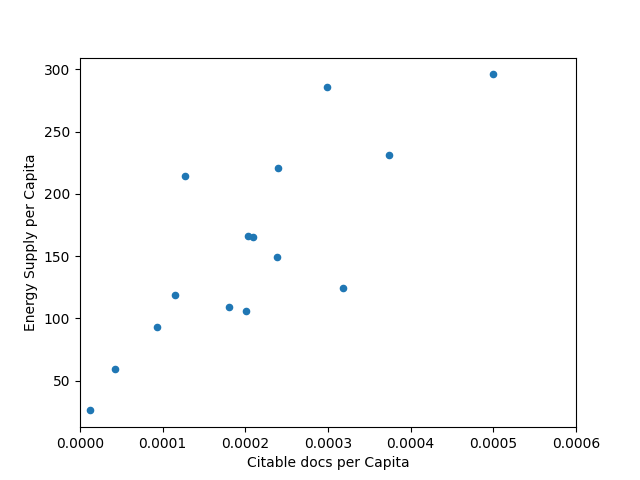

In [12]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib notebook

citableDocEst = df[['Citable documents', 'Energy Supply', 'Energy Supply per Capita']]
citableDocEst['PopEst'] = popEst['population estimation']
citableDocEst['Citable docs per Capita'] = citableDocEst['Citable documents'] / citableDocEst['PopEst']
citableDocEst= citableDocEst.sort_values(['Citable docs per Capita', 'Energy Supply per Capita']) # for better understanding of a correlation that is between 2 variables,
# citableDocEst= citableDocEst.sort_values('Energy Supply per Capita') # we can sort our varaibles.
    
corr, pval = pearsonr(citableDocEst['Citable docs per Capita'], citableDocEst['Energy Supply per Capita'])
print(corr,'\t',pval)

_ = citableDocEst.plot.scatter(x='Citable docs per Capita', y='Energy Supply per Capita', xlim=[0, 0.0006])

by using the following cell, we can create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median. on the other hand, we can calculate the median value for the `% Renewable` column. 

In [13]:
new_df = df
new_df.reset_index(inplace= True)
new_df = new_df[['Country', '% Renewable']]
median = new_df['% Renewable'].median()

def zero_one(item):
    if item >= median:
        return 1
    return 0

new_df = new_df.set_index('Country')
new_df['Renew >= median'] = new_df['% Renewable'].apply(lambda x: zero_one(x))
print("% Renewable median: {}".format(median))
new_df

% Renewable median: 17.02028


,% Renewable,Renew >= median
Country,,
China,19.754910,1
United States,11.570980,0
Japan,10.232820,0
United Kingdom,10.600470,0
Russian Federation,17.288680,1
Canada,61.945430,1
Germany,17.901530,1
India,14.969080,0
France,17.020280,1


by using the following cell, we can calculate the mean, size, sum, and standard deviation value for the whole countries that are on the same continent.

In [14]:
popEst.reset_index(inplace= True)
    
def grouping_countries(item):
    ContinentDict  = {'China':'Asia', 
                      'United Kingdom':'Europe', 
                      'Japan':'Asia', 
                      'Canada':'North America',
                      'Russian Federation':'Europe', 
                      'United States':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}

    if item in ContinentDict.keys():
            return ContinentDict[item]

        
popEst['Continent']= popEst['Country'].apply(lambda x : grouping_countries(x))

    
DF = (popEst.set_index('Continent')
                .groupby(level= 0)
                .agg({'population estimation': (np.size, np.sum, np.mean, np.std)}))
    
DF= DF['population estimation'][['size', 'sum', 'mean', 'std']]
DF

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


by using the following cell,we can cut `% Renewable` values into 5 bins, and find out how many countries of each continent that are in the same bin(or group).

In [34]:
Renewable= df[['% Renewable', 'Country']]
Renewable = Renewable.reset_index()

Renewable['Continent']= Renewable['Country'].apply(lambda x : grouping_countries(x))
Renewable['% Renewable'] = pd.cut(Renewable['% Renewable'], bins=5)
    
# by using .size(), we can count the number of % Renewable bins for each group.
# we can remove the instances that have missing data by using .dropna(). 
series = Renewable.groupby(['Continent', '% Renewable']).agg(np.size).dropna()['Country']
series = series.astype(np.int64) # change the type of Series column  
series

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
Name: Country, dtype: int64